---
# Flight Price Prediction
### Fitting model using Random Forest
---

## 1. Introduction 
---

Flight price prediction is a challenging and important problem in the travel industry as accurately predicting the price of flights can help travel agencies, airlines and customers make informed decisions about flight bookings.

### 1.1 Problem Statement

The problem statement for flight price prediction is to develop a model that can accurately predict the price of flights for different routes and dates. This is a challenging problem because flight prices are affected by many factors including airline, route, departure time, seasonality and competition.

### 1.2 Goal

The goal is to build a machine learning model that can take these factors into account and accurately predict the price of flights for new routes and dates. This model can be used by travel agencies, airlines and customers to make informed decisions about flight bookings.

### 1.3 Approach

To solve this problem, we have access to flight data including historical prices, flight routes, airline information and other relevant factors. We can then use this data to train and validate machine learning models that can predict flight prices based on the input features to ensure their accuarcy and effectiveness. Here, we will be using **Random Forest**


### 1.4 Use case

This problem is an important one for the travel industry and has many real-world applications such as dynamic pricing, demand forecasting and revenue management.

## 2. Importing Essential Libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Importing and  Exploring Dataset
---
1. The dataset is in the form of an Excel file.
2. The dataset needs to be loaded using the pandas read_excel() function.
3. The dataset needs to be checked for completeness to identify any hidden information such as null values in a column or a row.
4. Null values need to be checked and addressed if present using imputation methods in sklearn or by filling NaN values with mean, median or mode using the fillna() method.
5. A statistical analysis can be performed by describing the dataset to gain insights into its features and distributions.

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

### 3.1 Data Eyeballing

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# checking frequency of duration
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
# checking for null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### 3.2 Data Description

This dataset contains information about flight details including Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, and Price. It contains 10683 entries with 11 columns. The data types of the columns are mainly object type with the exception of the 'Price' column which is of type int64.

The 'Duration' column shows the duration of the flight in hours and minutes, and has 368 unique values.

The dataset has 2 missing values, one in the 'Route' column and the other in the 'Total_Stops' column.

In [9]:
#dropping null values
train_data.dropna(inplace = True)

In [10]:
# checking if null values are dropped
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We are now ready to move on to the (Exploratory Data Analysis)EDA

## 4. Exploratory Data Analysis (EDA)
---

### 4.1 Handling Date Time Data

#### 4.1.1 Date_of_Journey column

As per the Data Description, the **Date_of_Journey** column is currently of object data type. To utilize this column effectively for  prediction, it needs to be converted to timestamp data type. This can be achieved using the pandas **`to_datetime`** method to convert object data type to  datetime data type. \
Furthermore, to extract the day and month from the date, we can use the **`.dt.day`** and **`.dt.month`** methods respectively.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>


In [16]:
train_data["Journey_Day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [15]:
train_data["Journey_Month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [14]:
train_data["Journey_Day_of_Week"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day_of_week

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Date_of_Journey      10682 non-null  object
 2   Source               10682 non-null  object
 3   Destination          10682 non-null  object
 4   Route                10682 non-null  object
 5   Dep_Time             10682 non-null  object
 6   Arrival_Time         10682 non-null  object
 7   Duration             10682 non-null  object
 8   Total_Stops          10682 non-null  object
 9   Additional_Info      10682 non-null  object
 10  Price                10682 non-null  int64 
 11  Journey_Day          10682 non-null  int64 
 12  Journey_Month        10682 non-null  int64 
 13  Journey_Day_of_Week  10682 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


The necessary information from **Date_of_Journey** column has been extracted and converted into integers using **`to_datetime`** method. Since the **Date_of_Journey** column is no longer needed, it can be dropped to reduce the size of the dataframe and improve the performance of the subsequent analysis.\
In order to drop this column,we will use **`drop`** method.

In [18]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


#### 4.1.2 Dep_Time Column

Likewise to how we extracted useful features from **Date_of_Journey** column, we will perform similar operation on the **Dep_Time** column. Departure Time is when a plane leaves the origin airport.

In [20]:
# Extracting Hours
train_data["Dep_Hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,16


In [21]:
# Extracting Minutes
train_data["Dep_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


In [22]:
# Dropping Dep_Time Column
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


#### 4.1.3 Arrival_Time Column

Likewise to how we extracted useful features from **Date_of_Journey** and **Dep_Time** column, we will perform similar operation on the **Arrival_Time** column. Arrival Time is when a plane reaches the desination airport.

In [23]:
# Extracting Hours
train_data["Arrival_Hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50,21


In [24]:
# Extracting Minutes
train_data["Arrival_Min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35


In [25]:
# Dropping Arrival_Time Column
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35


#### 4.1.4 Duration Column

Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival Time.

We now aim to extract the duration of each flight from the given **Duration** column in two separate new columns **Duration_Hours** and **Duration_Mins**. 

In [46]:
# Raw code to give an idea  what we are going to do with Duration column

duration = "2h 50m"

hours = int(duration.split(sep = "h")[0])
print(f"Hours:{hours}")
mins = int(duration.split(sep = "m")[0].split()[-1])
print(f"Mins:{mins}")

Hours:2
Mins:50


In [47]:
# Converted the Duration column into a list
duration = list(train_data['Duration'])

duration_hours = []
duration_mins = []

# Iterate through the duration list and split hours and minutes
for d in duration:
    hours, mins = 0,0
    
    if "h" in d:
        hours = int(d.split("h")[0])
    if "m" in d:
        mins = int(d.split("m")[0].split()[-1])
    duration_hours.append(hours)
    duration_mins.append(mins)

The code first converts the "Duration" column into a list and two empty lists, "duration_hours" and "duration_mins". 

For each element in the "duration" list, the code extracts the hours and minutes separately and appends them to the respective lists. This way the "duration_hours" list contains all the hours of the duration of each flight and the "duration_mins" list contains all the minutes of the duration of each flight.

In [49]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data['Duration_Hours'] = duration_hours
train_data['Duration_Mins'] = duration_mins

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35,4,45


In [50]:
# Dropping Duration Column

train_data.drop(["Duration"], axis = 1, inplace = True)

In [52]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50,21,35,4,45


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_Day          10682 non-null  int64 
 8   Journey_Month        10682 non-null  int64 
 9   Journey_Day_of_Week  10682 non-null  int64 
 10  Dep_Hour             10682 non-null  int64 
 11  Dep_Min              10682 non-null  int64 
 12  Arrival_Hour         10682 non-null  int64 
 13  Arrival_Min          10682 non-null  int64 
 14  Duration_Hours       10682 non-null  int64 
 15  Duration_Mins        10682 non-null  int64 
dtypes: i

In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

### 4.2 Handling Categorical Data

Categorical Data is of two types **nominal** and **ordinal** data. Nominal Data is not in any specific order while ordinal data is in specific order. To handle nominal data, **One Hot Encoding** is used and to handle ordinal data, **Label Encoding** is used.


1. <span style="color: green;">**OneHotEncoder**</span> is used for <span style="color: blue;">**Nominal data**</span>
2. <span style="color: green;">**LabelEncoder**</span> is used for <span style="color: blue;">**Ordinal data**</span>


#### 4.2.1 Airline Column

In [53]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [54]:
# Clubbing less number of flights together as Others
train_data["Airline"] = np.where(train_data.Airline.isin(["Multiple carriers Premium economy",
                                                          "Jet Airways Business",
                                                          "Vistara Premium economy",
                                                          "Trujet"]), "Others", train_data.Airline)

train_data["Airline"].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Others                 23
Name: Airline, dtype: int64

#### 4.2.1.1 Airline Vs Price

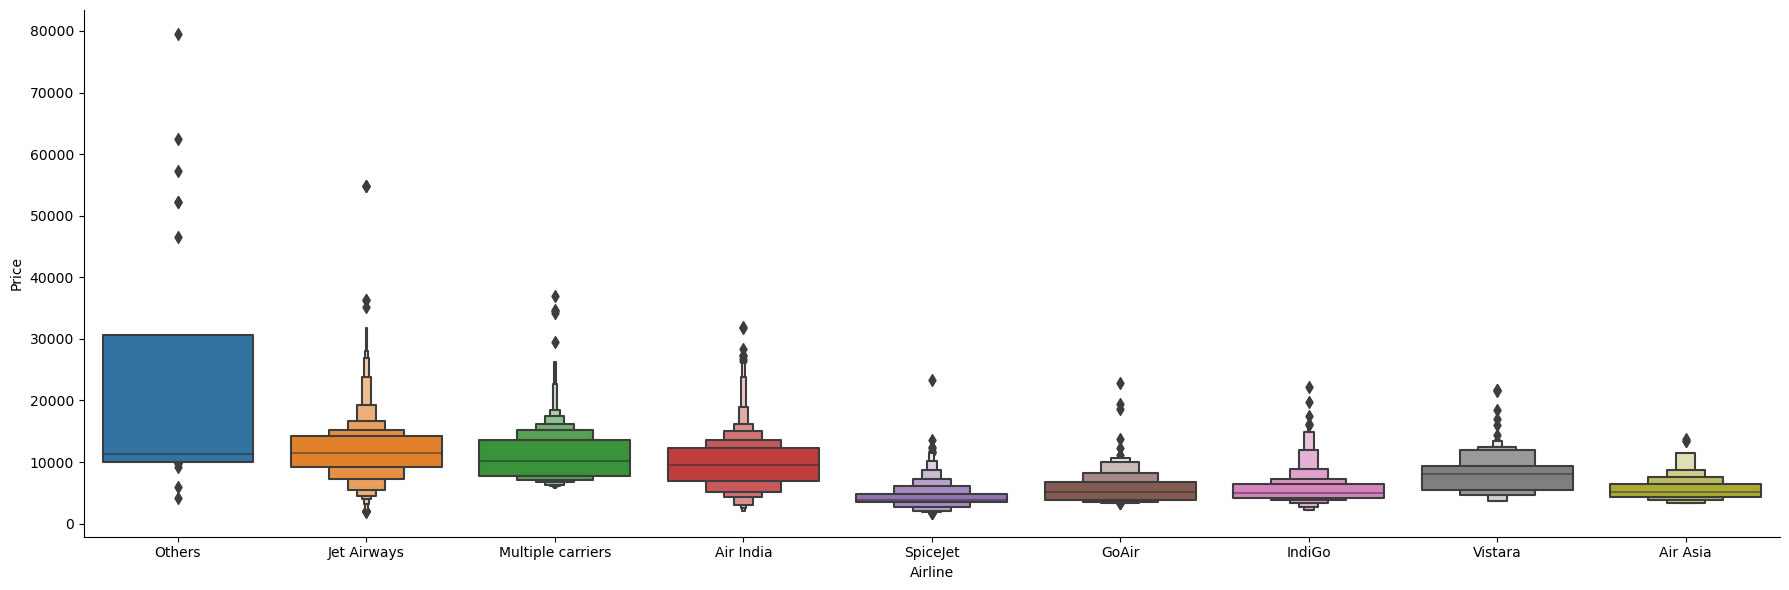

In [55]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False),
            kind="boxen", height = 6, aspect = 3)
plt.show()

#### Inference
From graph we can see that Jet Airways Business have the highest Price.
Apart from the first Airline almost all are having similar median

#### 4.2.1.2 One Hot Encoding on Airline Column
As Airline is Nominal Categorical data we will perform OneHotEncoding

In [56]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


#### 4.2.1 Source Column

In [57]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### 4.2.2.1 Source Vs Price

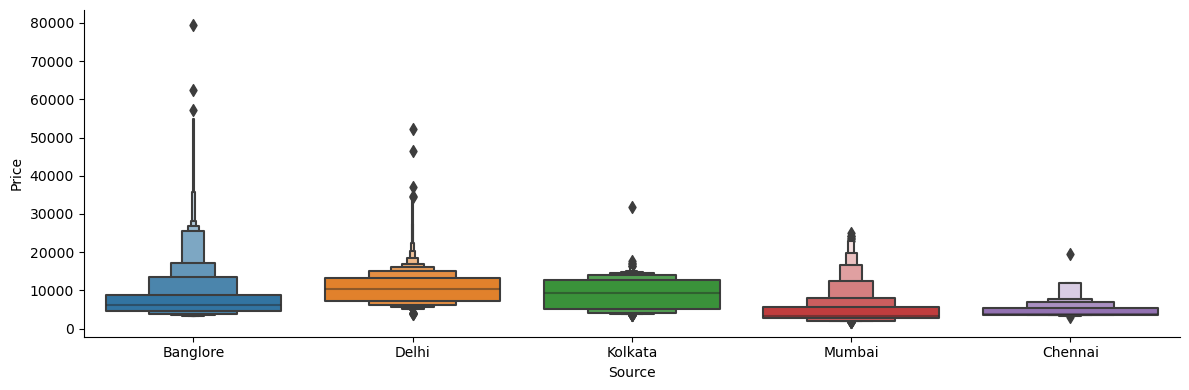

In [58]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

#### Inferenec

#### 4.2.2.2 One Hot Encoding on Source  column

As Source is Nominal Categorical data we will perform OneHotEncoding

In [59]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### 4.2.3 Destination Column

In [60]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#### 4.2.3.1 One Hot Encoding on Destination column

As Destination is Nominal Categorical data we will perform OneHotEncoding

In [61]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### 4.2.4 Route Column

In [62]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

We will try to extract stop cities from the Route column

In [63]:
train_data["Stop_Cities"] = train_data.Route.apply(lambda x: ' '.join(x.split(" → ")[1:-1]))

train_data["Stop_Cities"]

0               
1        IXR BBI
2        LKO BOM
3            NAG
4            NAG
          ...   
10678           
10679           
10680           
10681           
10682    GOI BOM
Name: Stop_Cities, Length: 10682, dtype: object

In [64]:
train_data[["Route","Stop_Cities"]]

,Route,Stop_Cities
0,BLR → DEL,
1,CCU → IXR → BBI → BLR,IXR BBI
2,DEL → LKO → BOM → COK,LKO BOM
3,CCU → NAG → BLR,NAG
4,BLR → NAG → DEL,NAG
...,...,...
10678,CCU → BLR,
10679,CCU → BLR,
10680,BLR → DEL,
10681,BLR → DEL,


#### 4.2.4.1 Feature Extraction for Stop Cities

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vectorizer = CountVectorizer(binary=True)

In [67]:
vectorizer.fit_transform(train_data.Stop_Cities).todense().shape

(10682, 42)

In [68]:
Intermediate = pd.DataFrame(vectorizer.fit_transform(train_data.Stop_Cities).todense(),
             columns=vectorizer.get_feature_names())

C:\Users\manis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
Intermediate

,amd,atq,bbi,bdq,bho,blr,bom,ccu,cok,ded,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.2.5 Total Stops Column

In [70]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### 4.2.5.1 Label Encoding on Total Stops Column

In [71]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2,
                    "3 stops": 3, "4 stops": 4}, inplace = True)

In [72]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Stop_Cities
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,6,22,20,1,10,2,50,
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2,5,50,13,15,7,25,IXR BBI
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,6,9,25,4,25,19,0,LKO BOM
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,6,18,5,23,30,5,25,NAG
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,4,16,50,21,35,4,45,NAG


### 4.3 Concatinating DataFrame

#### 4.3.1 Concatenaing encoded column

In [73]:
data_train = pd.concat([train_data, Airline, Source, Destination, Intermediate], axis = 1)

In [75]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.3.2 Dropping Column 

In [76]:
data_train.drop(["Airline", "Source", "Destination", "Route", "Additional_Info", "Stop_Cities"], axis = 1, inplace = True)

In [77]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,0.0,3897.0,24.0,3.0,6.0,22.0,20.0,1.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,7662.0,1.0,5.0,2.0,5.0,50.0,13.0,15.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,13882.0,9.0,6.0,6.0,9.0,25.0,4.0,25.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6218.0,12.0,5.0,6.0,18.0,5.0,23.0,30.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,13302.0,1.0,3.0,4.0,16.0,50.0,21.0,35.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
data_train.shape

(10683, 70)

## 5. Test Dataset

---

Performing **Stage-3: Importing and Exploring Dataset** and **Stage-5: Exploratory Data Analysis(EDA)** on Test Data

In [106]:
test_data = pd.read_excel("Test_set.xlsx")

### 5.1 Data Eyeballing

In [107]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [108]:
print("Test Data Information")
print("-"*100)
print(f"{test_data.info()}\n\n")

Test Data Information
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None




In [109]:
print("Null values in Test Data:")
print("-"*100)
print(f"{test_data.isnull().sum()}")
print("After processing Null values in Test Data:")
print("-"*100)
test_data.dropna(inplace = True)
print(f"{test_data.isnull().sum()}\n\n")

Null values in Test Data:
----------------------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
After processing Null values in Test Data:
----------------------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64




### 5.2 Exploratory Data Analysis (EDA)

#### 5.2.1 EDA on Date Time Data

In [110]:
print("Date_of_Journey Column")
print("-"*50)
test_data["Journey_Day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_Month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Journey_Day_of_Week"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day_of_week
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
print("Data Eyeballing after EDA on Date_of_Journey Column")
test_data.head()

Date_of_Journey Column
--------------------------------------------------
Data Eyeballing after EDA on Date_of_Journey Column


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Day_of_Week
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,1
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,0


In [111]:
print("Dep_Time Column")
print("-"*50)
test_data["Dep_Hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_Min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
print("Data Eyeballing after EDA on Dep_Time Column")
test_data.head()

Dep_Time Column
--------------------------------------------------
Data Eyeballing after EDA on Dep_Time Column


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,3,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,1,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,1,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,0,23,55


In [112]:
print("Arrival_Time Column")
print("-"*50)
test_data["Arrival_Hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_Min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)
print("Data Eyeballing after EDA on Arrival_Time Column")
test_data.head()

Arrival_Time Column
--------------------------------------------------
Data Eyeballing after EDA on Arrival_Time Column


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,3,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,1,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,1,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,0,23,55,2,45


In [113]:
print("Duration Column")
print("-"*50)
duration = list(test_data['Duration'])

duration_hours = []
duration_mins = []

# Iterate through the duration list and split hours and minutes
for d in duration:
    hours, mins = 0,0
    
    if "h" in d:
        hours = int(d.split("h")[0])
    if "m" in d:
        mins = int(d.split("m")[0].split()[-1])
    duration_hours.append(hours)
    duration_mins.append(mins)

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)
print("Data Eyeballing after EDA on Duration Column")
test_data.head()

Duration Column
--------------------------------------------------
Data Eyeballing after EDA on Duration Column


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,3,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,1,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,1,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,0,23,55,2,45,2,50


#### 5.2.2 EDA on Categorical Data

In [114]:
print("Airline Column")
print("-"*50)
print(test_data["Airline"].value_counts())
test_data["Airline"] = np.where(test_data.Airline.isin(["Multiple carriers Premium economy",
                                                        "Jet Airways Business",
                                                        "Vistara Premium economy",
                                                        "Trujet"
                                                       ]), "Others", test_data.Airline)
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)
print("Data Eyeballing after One Hot Encoding on Airline Column")
Airline.head()

Airline Column
--------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
Data Eyeballing after One Hot Encoding on Airline Column


,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Others,SpiceJet,Vistara
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0


In [115]:
print("Source Column")
print("-"*50)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)
print("Data Eyeballing after One Hot Encoding on Source Column")
Source.head()


Source Column
--------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Data Eyeballing after One Hot Encoding on Source Column


,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [116]:
print("Destination Column")
print("-"*50)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
print("Data Eyeballing after One Hot Encoding on Destination Column")
Destination.head()

Destination Column
--------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
Data Eyeballing after One Hot Encoding on Destination Column


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [117]:
print("Stop_Cities Column")
print("-"*50)
test_data["Stop_Cities"] = test_data.Route.apply(lambda x: ' '.join(x.split(" → ")[1:-1]))
Intermediate = pd.DataFrame(vectorizer.transform(test_data.Stop_Cities).todense(),
             columns=vectorizer.get_feature_names())
print("Data Eyeballing after One Hot Encoding on Stop_Cities Column")
Intermediate.head()

Stop_Cities Column
--------------------------------------------------
Data Eyeballing after One Hot Encoding on Stop_Cities Column


C:\Users\manis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amd,atq,bbi,bdq,bho,blr,bom,ccu,cok,ded,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
print("Total_Stops Column")
print("-"*50)
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
print("Data Eyeballing after Label Encoding on Total_Stops Column")
test_data.head()

Total_Stops Column
--------------------------------------------------
Data Eyeballing after Label Encoding on Total_Stops Column


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Stop_Cities
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,3,17,30,4,25,10,55,BOM
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,6,20,10,20,4,0,MAA
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,1,19,15,19,0,23,45,BOM
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,1,8,0,21,0,13,0,BOM
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,0,23,55,2,45,2,50,


In [119]:
print("Dropping unnecessary column left after EDA")
print("-"*50)
test_data.drop(["Route", "Additional_Info", "Stop_Cities"], axis = 1, inplace = True)


Dropping unnecessary column left after EDA
--------------------------------------------------


In [121]:
print("Concatenating test_data + Airline + Source + Destination")
print("-"*50)
data_test = pd.concat([test_data, Airline, Source, Destination, Intermediate], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print("Data Eyeballing after required EDA")
data_test.head()

Concatenating test_data + Airline + Source + Destination
--------------------------------------------------
Data Eyeballing after required EDA


,Total_Stops,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,1,6,6,3,17,30,4,25,10,55,...,0,0,0,0,0,0,0,0,0,0
1,1,12,5,6,6,20,10,20,4,0,...,0,0,0,0,0,0,0,0,0,0
2,1,21,5,1,19,15,19,0,23,45,...,0,0,0,0,0,0,0,0,0,0
3,1,21,5,1,8,0,21,0,13,0,...,0,0,0,0,0,0,0,0,0,0
4,0,24,6,0,23,55,2,45,2,50,...,0,0,0,0,0,0,0,0,0,0


In [123]:
data_test.shape

(2671, 69)

## 6. Feature Selection
---


The process aims to identify the most relevant features that have a significant impact on the target variable. There are various techniques available for feature selection and some of the commonly used ones are as follows:

<span style="color: purple;">**Heatmap**</span>: This method uses a graphical representation of the correlation between the features and the target variable. It helps to identify which features have the highest correlation with the target variable.

<span style="color: purple;">**Feature Importance**</span>: This method ranks the importance of features based on how much they contribute to the accuracy of the model. It is commonly used in decision tree-based models such as Random Forest.

<span style="color: purple;">**SelectKBest**</span>: This method selects the top K features that have the highest correlation with the target variable. It uses statistical methods to identify the most relevant features.

### 6.1 Heatmap

Finds correlation between Independent and dependent attributes


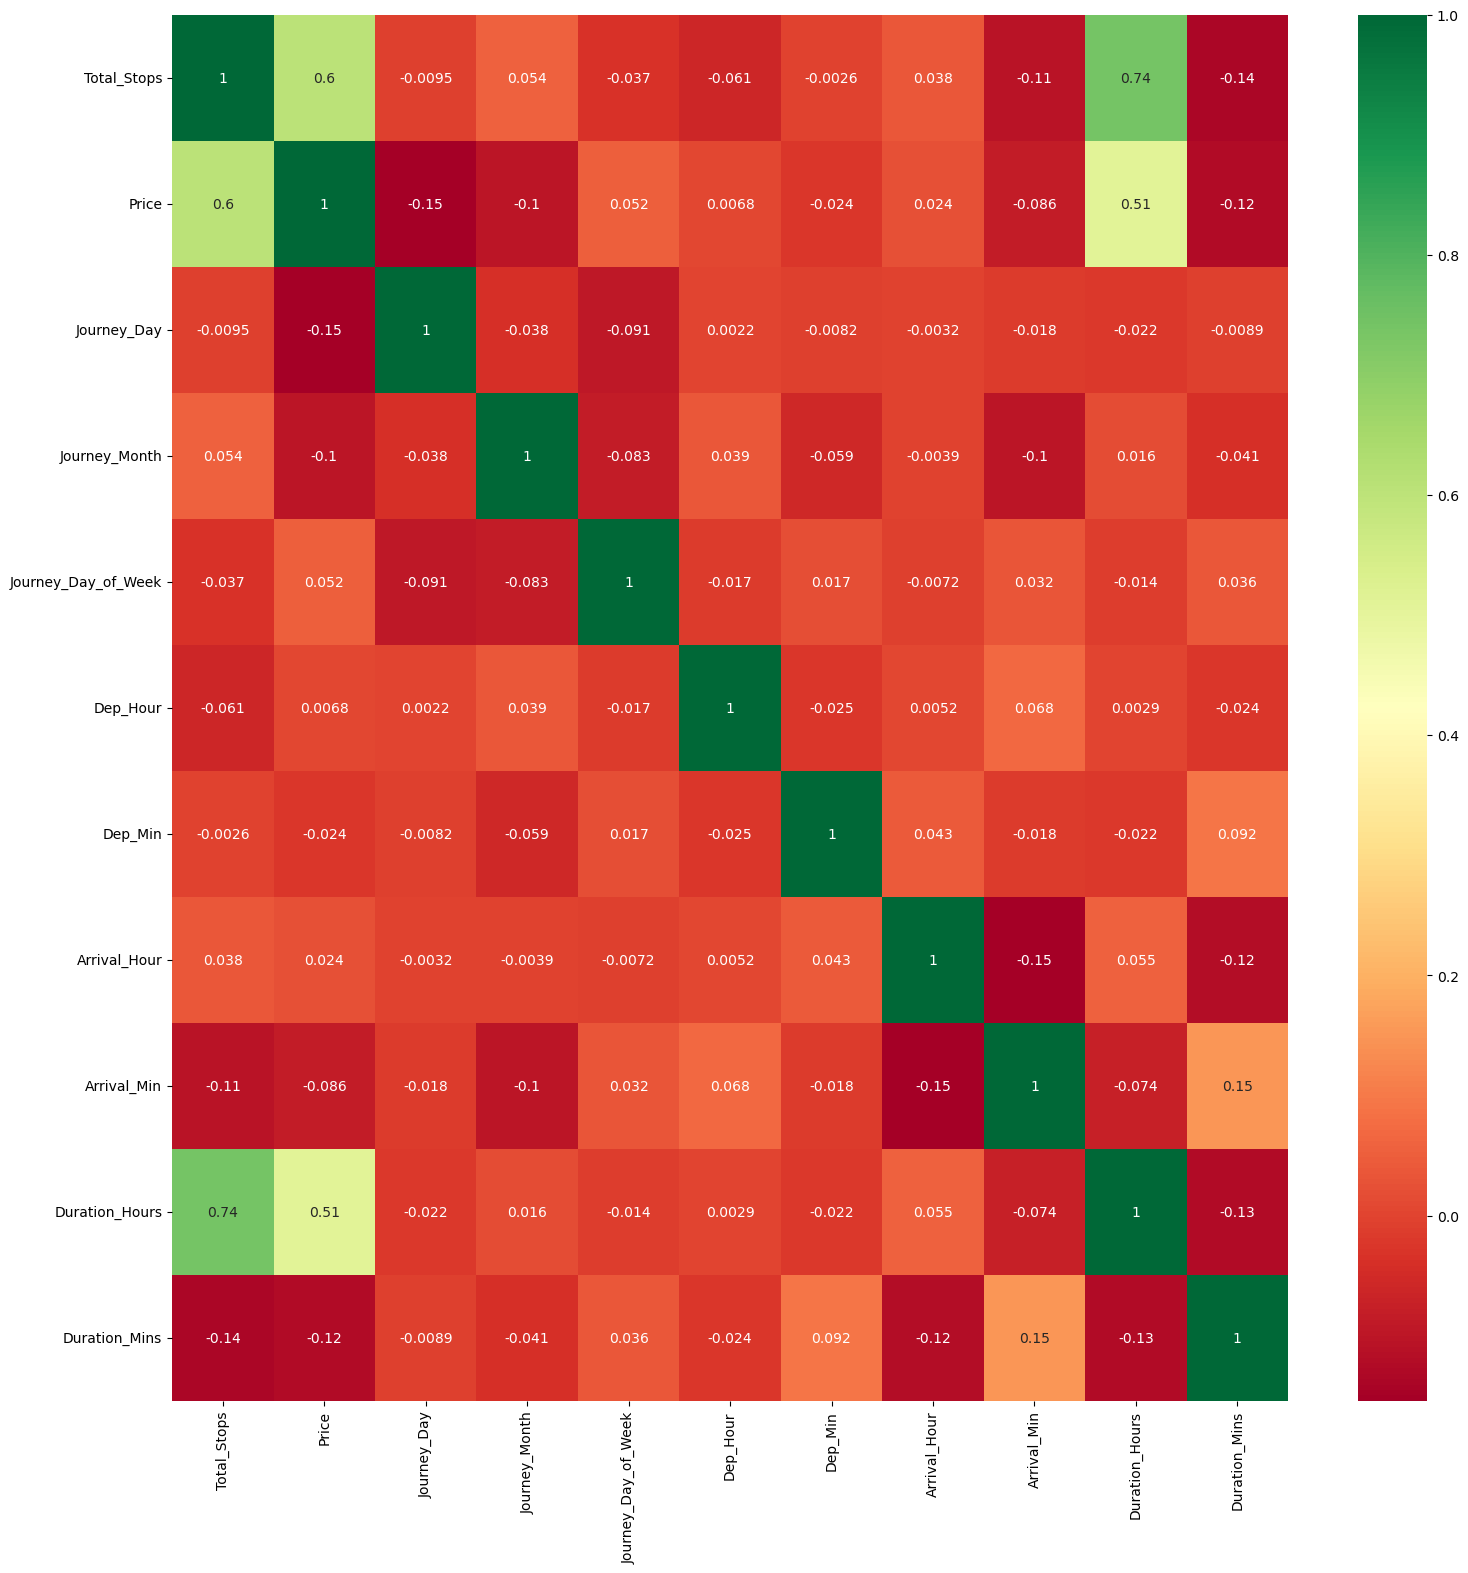

In [129]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [124]:
data_train.shape

(10683, 70)

In [130]:
data_train.dropna(inplace=True)
data_train.isnull().sum()

Total_Stops            0
Price                  0
Journey_Day            0
Journey_Month          0
Journey_Day_of_Week    0
                      ..
trv                    0
udr                    0
vga                    0
vns                    0
vtz                    0
Length: 70, dtype: int64

In [126]:
X = data_train.drop('Price', axis=1)
X.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Day_of_Week,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,...,ndc,pat,pnq,rpr,stv,trv,udr,vga,vns,vtz
0,0.0,24.0,3.0,6.0,22.0,20.0,1.0,10.0,2.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,5.0,2.0,5.0,50.0,13.0,15.0,7.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,9.0,6.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,12.0,5.0,6.0,18.0,5.0,23.0,30.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,3.0,4.0,16.0,50.0,21.0,35.0,4.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
y = data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### 6.2 Feature Importance

In [131]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [132]:
print(selection.feature_importances_)

[1.67928558e-01 1.21188161e-01 5.13819633e-02 3.40399661e-02
 1.85492770e-02 1.62107760e-02 2.15594856e-02 1.38945595e-02
 1.07632849e-01 1.21925657e-02 8.78849512e-03 2.05351595e-03
 3.35864582e-02 5.19254887e-02 1.14969102e-02 3.85418109e-02
 4.68632806e-03 4.29311430e-03 5.18473567e-04 3.94859956e-03
 2.85099778e-03 3.76022149e-03 3.28722806e-03 1.45647939e-03
 4.54408357e-03 5.89724403e-04 3.76241872e-02 1.59811985e-03
 3.86339894e-04 1.41963629e-03 3.10541045e-04 1.04695375e-03
 9.48947919e-04 1.64046672e-01 1.25150080e-03 3.56599751e-04
 6.38478400e-05 2.75118642e-02 2.26901612e-03 1.26420061e-03
 2.05542471e-05 1.84327337e-04 3.60111378e-03 1.71847587e-03
 6.21456913e-06 9.00269623e-06 2.39375658e-05 4.68483380e-04
 3.75627022e-05 5.84576009e-04 8.24436513e-04 1.64682596e-05
 1.38064118e-03 3.28881657e-03 1.45425007e-05 1.61841947e-04
 4.81450324e-04 2.21362900e-03 9.51303657e-04 1.99380708e-04
 9.96042839e-04 1.26244649e-03 1.53095406e-05 1.32412250e-05
 8.95994650e-05 1.213163

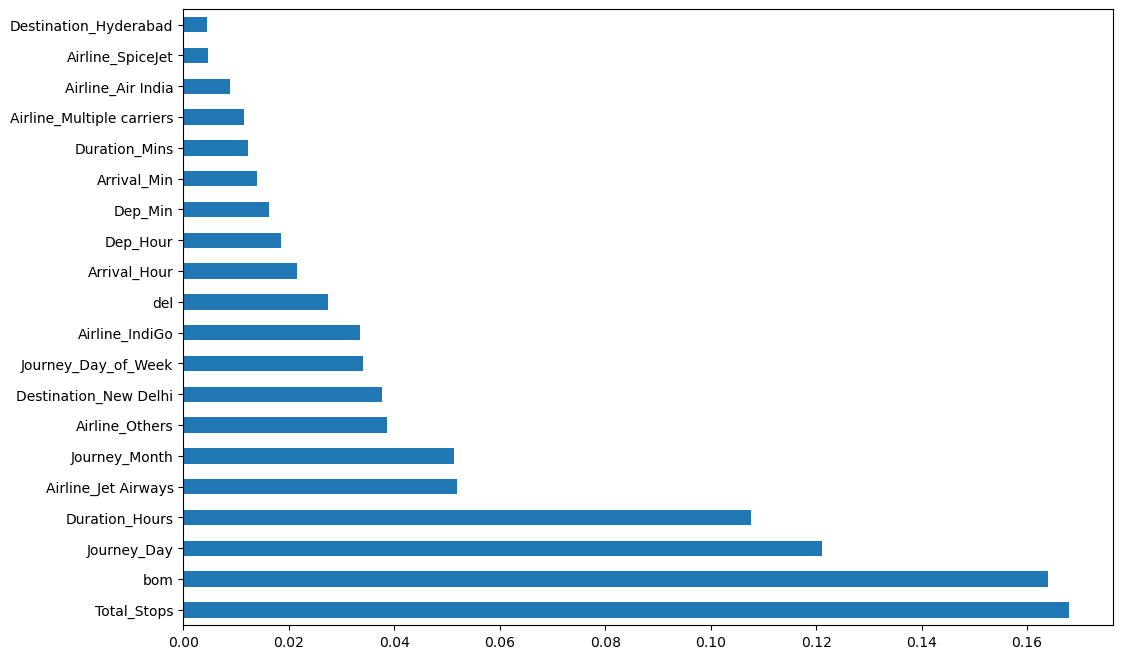

In [133]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## 7. Fitting model using Random Forest

---

The given steps describe how to fit a model using Random Forest algorithm:

1. Split the dataset into training and test sets, so that the model can be trained on the training set and tested on the test set to make predictions.
2. Scale the data if required. However, scaling is not necessary for Random Forest algorithm.
3. Import the Random Forest model from the appropriate library.
4. Fit the model on the training data using the fit() method.
5. Predict the target variable values using the predict() method and input the test data as parameter.
6. For regression problems, evaluate the performance of the model using the RMSE (Root Mean Squared Error) score.
7. Plot graphs to analyze the performance of the model.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [135]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
y_pred = reg_rf.predict(X_test)

In [137]:
y_pred

array([ 7252.29 ,  8486.63 , 10890.708, ...,  4720.62 ,  1968.52 ,
       12239.25 ])

In [138]:
reg_rf.score(X_train, y_train)

0.9570306263193025

In [139]:
reg_rf.score(X_test, y_test)

0.8068916885337929

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


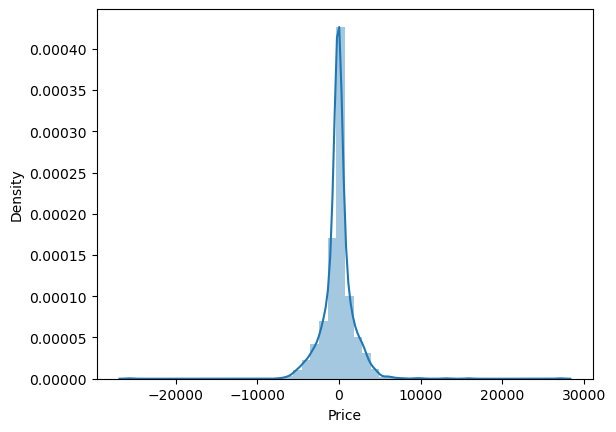

In [140]:
sns.distplot(y_test-y_pred)
plt.show()

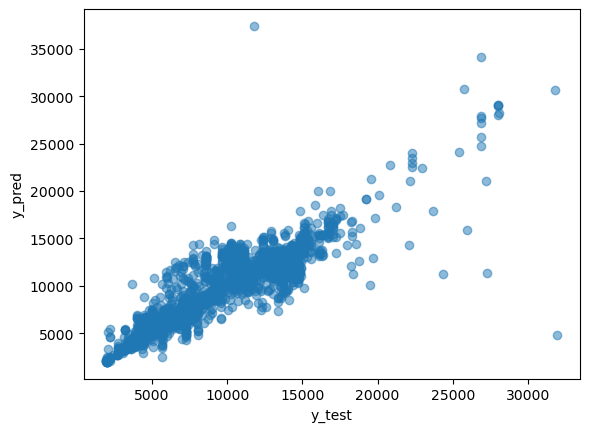

In [141]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [142]:
from sklearn import metrics

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1142.6959885446147
MSE: 3776341.68246295
RMSE: 1943.2811640272105


In [144]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [145]:
metrics.r2_score(y_test, y_pred)

0.8068916885337929

## 8. Hyperparameter Tuning

---
To optimize our model, we can use hyperparameter tuning techniques such as RandomizedSearchCV or GridSearchCV.

Here are the steps to follow:

1. Choose a tuning method based on your preference or the size of your dataset. RandomizedSearchCV is faster but GridSearchCV can be more exhaustive.
2. Define a dictionary of hyperparameters to test out.
3. Fit the model using the tuning method and the defined hyperparameters.
4. Check the best parameters and best score found during the tuning process.

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [50, 100, 150]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [148]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [149]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid, scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [150]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [151]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [152]:
prediction = rf_random.predict(X_test)

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


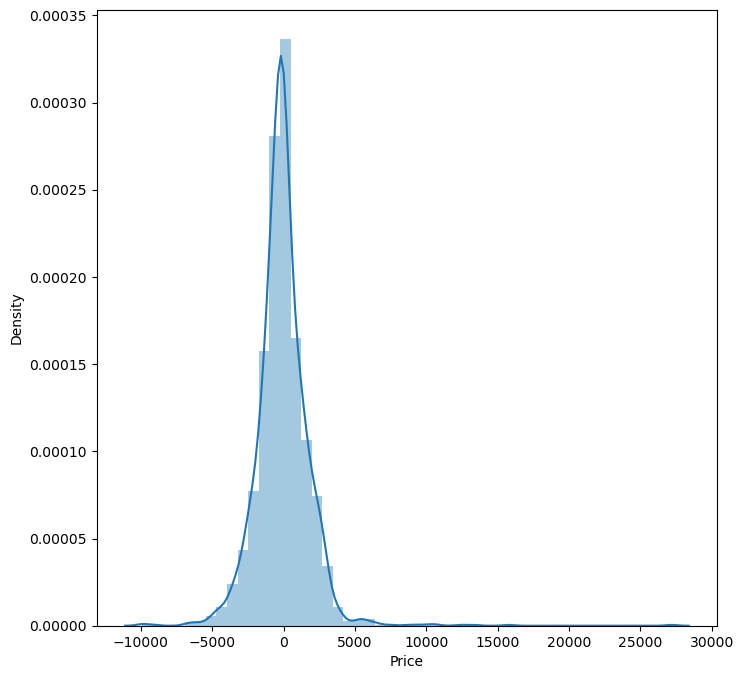

In [153]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

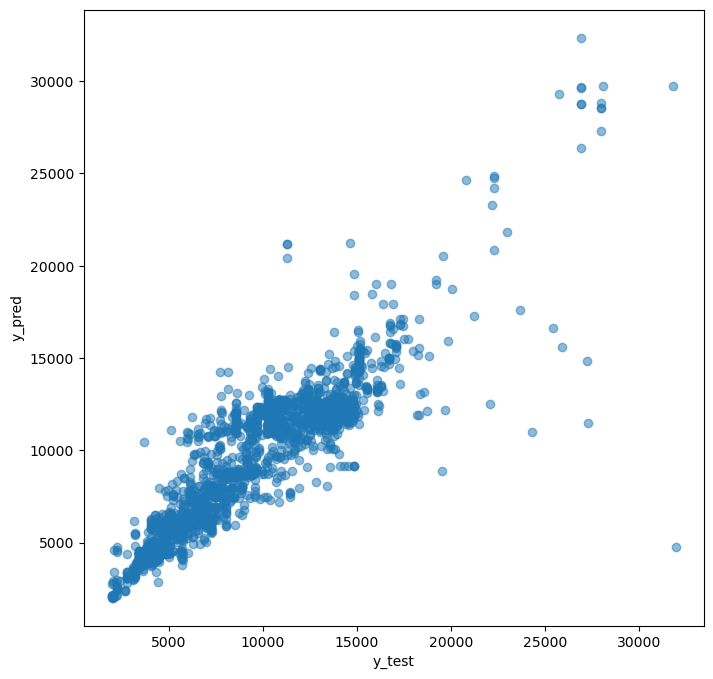

In [154]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1239.2600066636433
MSE: 3513586.1918970295
RMSE: 1874.4562389922655


## 9. Saving the Model for Future Use

In [156]:
import pickle
# open a file, where you ant to store the data
file = open('flight_random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [157]:
model = open('flight_random_forest.pkl','rb')
forest = pickle.load(model)

In [158]:
y_prediction = forest.predict(X_test)

In [159]:
metrics.r2_score(y_test, y_prediction)

0.8068916885337929